In [2]:
#Diabetes Risk Analysis and Prediction based on different symptoms, age and gender

import pandas as pd
import numpy as np
df = pd.read_csv("diabetes_data_upload.csv")
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.isnull().sum()


Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df.shape

(520, 17)

In [6]:
df1 = df.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column  in df1.columns[1:]:
    df1[column]= le.fit_transform(df1[column])
df1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


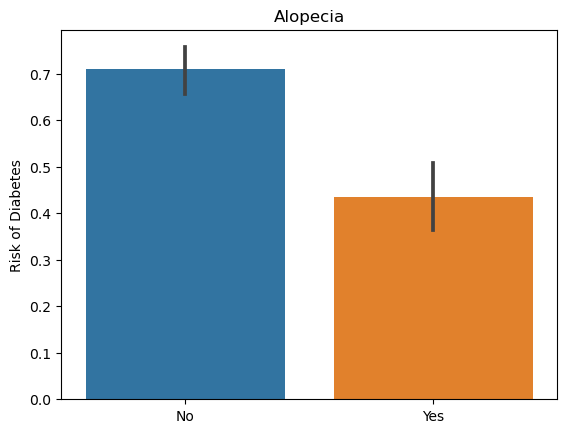

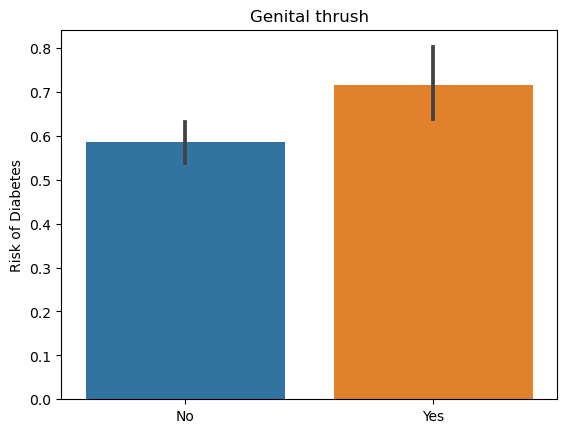

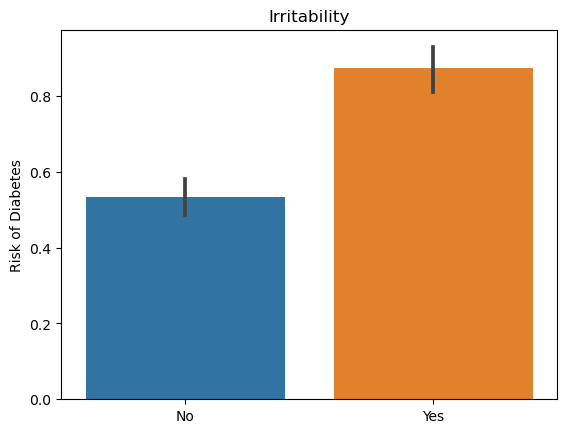

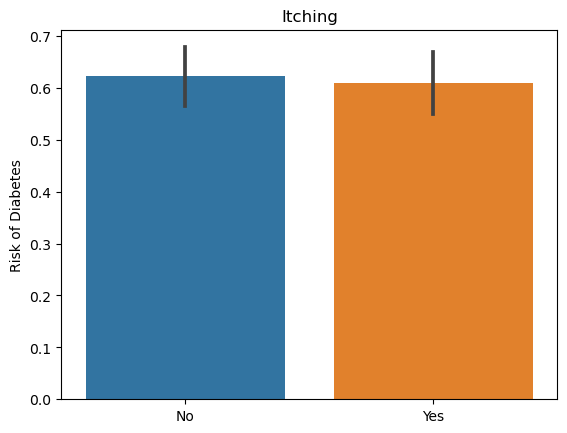

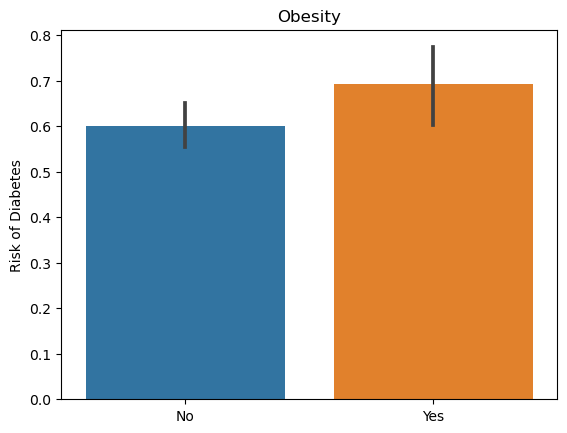

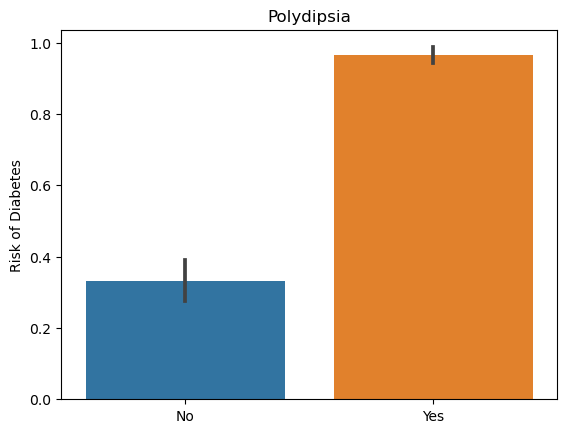

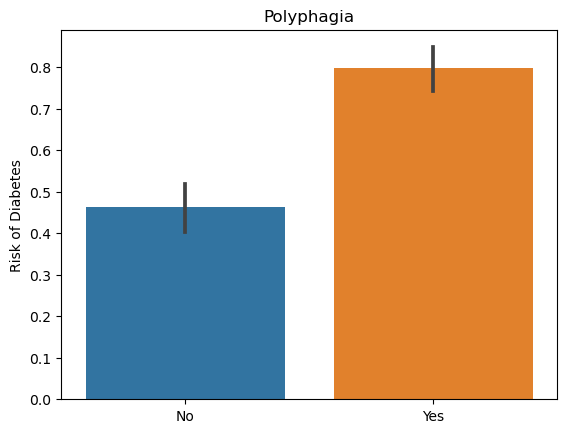

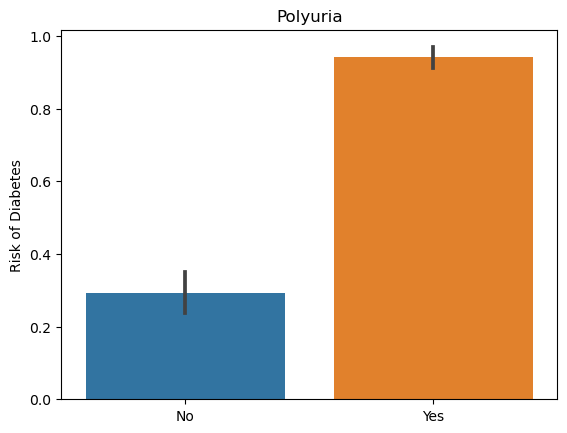

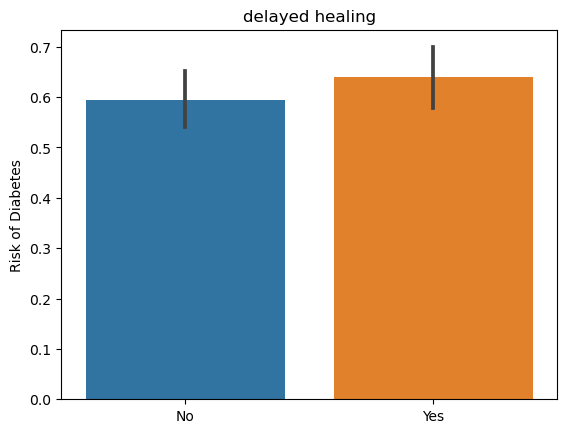

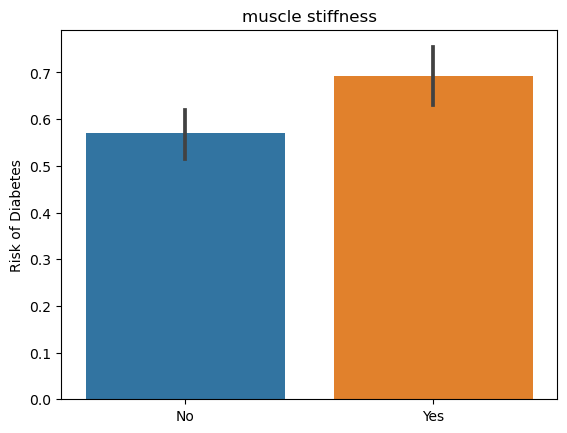

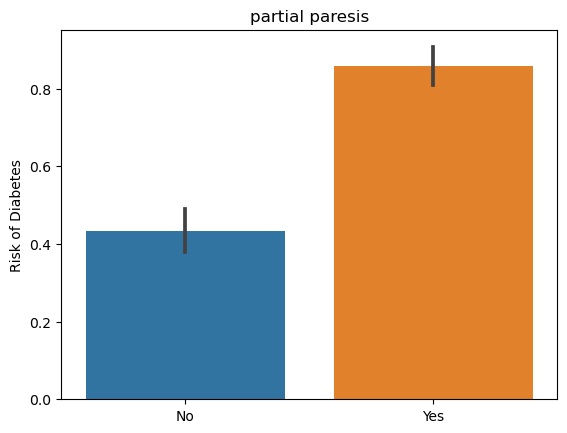

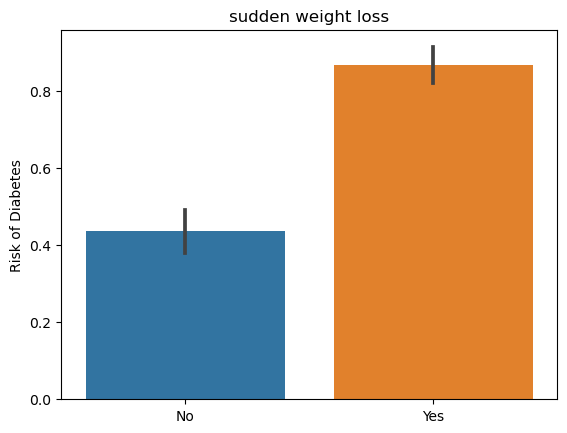

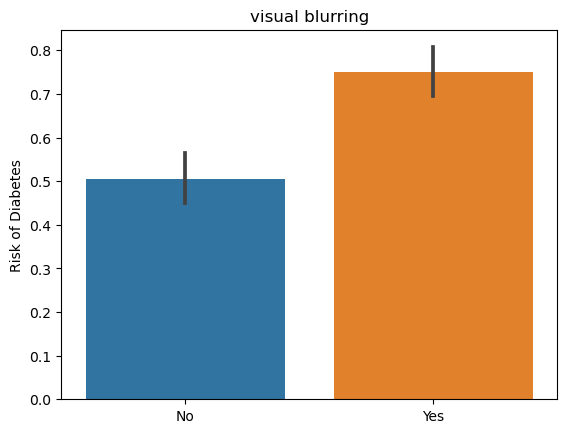

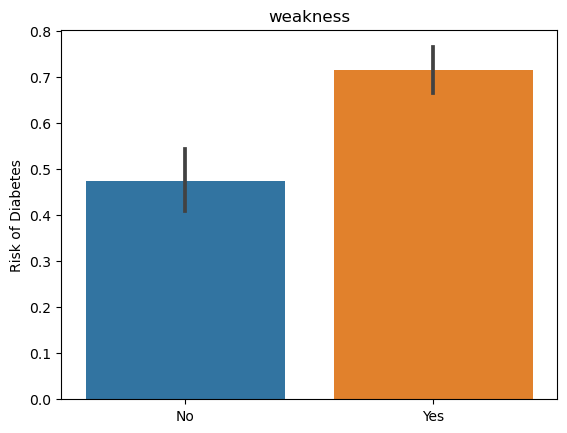

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df_symptoms = df1[df1.columns.difference(["Age", "class", "Gender"])]

for column in df_symptoms.columns:
    ax = sns.barplot(x=column, y="class", data=df1)
    ax.set_xticklabels(["No", "Yes"])
    ax.set_ylabel("Risk of Diabetes")
    ax.set_xlabel(None)
    plt.title(column)
    plt.show()


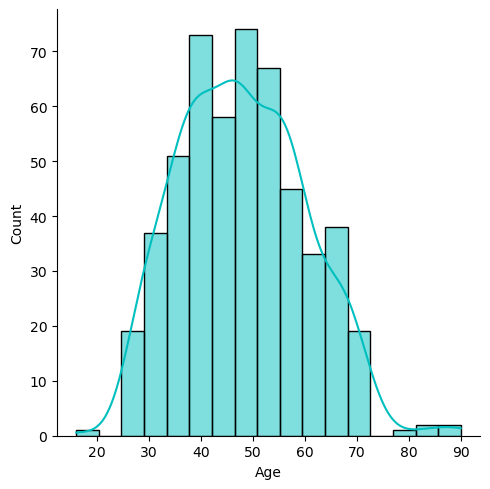

In [8]:
ag = sns.displot(df["Age"], color="c", kde= True)


<Axes: >

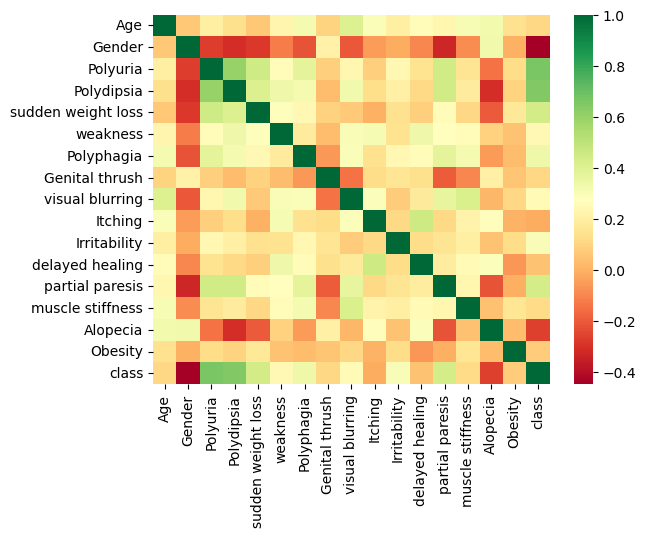

In [9]:
sns.heatmap(df1.corr(),cmap='RdYlGn')

In [10]:
subset =df.iloc[:,:-1]
sorted_vals = np.abs(subset.corrwith(df1['class'])).sort_values(ascending=False)
print(sorted_vals)

Age    0.108679
dtype: float64


C:\Users\shubh\AppData\Local\Temp\ipykernel_15732\1250707825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_vals = np.abs(subset.corrwith(df1['class'])).sort_values(ascending=False)


In [11]:
#copying the datframe
X = df1.drop('class', axis =1)
y = df1['class']

#splitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(364, 16) (364,)
(156, 16) (156,)


In [12]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#standard scaling
s=StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

In [13]:
#Testing different models: 
#Logistic Regression: 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR = LR.fit(X_train_s,y_train)
y_predict = LR.predict(X_test_s)
print(f'model score on training data: {LR.score(X_train_s, y_train)}')
print(f'model score on testing data: {LR.score(X_test_s, y_test)}')
LR.coef_

model score on training data: 0.9505494505494505
model score on testing data: 0.8974358974358975


array([[-0.18591246, -1.9070854 ,  1.77618485,  1.92788244,  0.26572276,
         0.70552922,  0.45347349,  0.3333031 ,  0.56431728, -1.61062041,
         1.0474483 ,  0.00828654,  0.48837376, -0.75434614,  0.0622248 ,
        -0.56989493]])

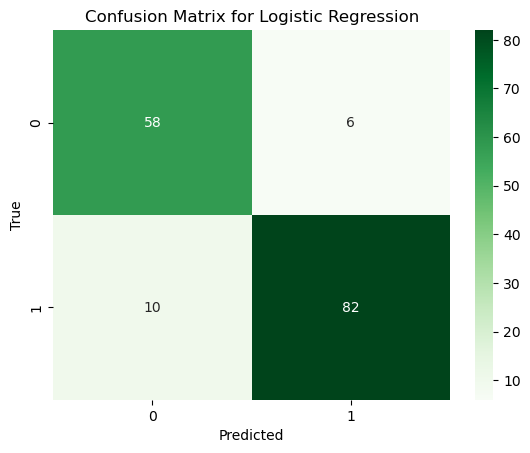

In [14]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

baseline_accuracy = accuracy_score(y_test, y_predict)

#permutation importance
perm_importance = permutation_importance(LR, X_test_s, y_test, n_repeats=10, random_state=42)

#feature importances
feature_importances = perm_importance.importances_mean
print("Permutation Importance:")
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance:.4f} (Decrease in Accuracy)")

Permutation Importance:
Age: -0.0032 (Decrease in Accuracy)
Gender: 0.0808 (Decrease in Accuracy)
Polyuria: 0.1583 (Decrease in Accuracy)
Polydipsia: 0.1179 (Decrease in Accuracy)
sudden weight loss: -0.0045 (Decrease in Accuracy)
weakness: 0.0045 (Decrease in Accuracy)
Polyphagia: 0.0269 (Decrease in Accuracy)
Genital thrush: 0.0103 (Decrease in Accuracy)
visual blurring: 0.0128 (Decrease in Accuracy)
Itching: 0.0417 (Decrease in Accuracy)
Irritability: 0.0404 (Decrease in Accuracy)
delayed healing: 0.0000 (Decrease in Accuracy)
partial paresis: 0.0282 (Decrease in Accuracy)
muscle stiffness: 0.0019 (Decrease in Accuracy)
Alopecia: 0.0000 (Decrease in Accuracy)
Obesity: -0.0013 (Decrease in Accuracy)


In [16]:
from sklearn.metrics import precision_score,recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict) 
f1 = f1_score(y_test, y_predict)    

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9318
Recall: 0.8913
ROC AUC: 0.8988
F1 Score: 0.9111


In [17]:
#Linear SVC:
from sklearn.svm import LinearSVC
LinSVC = LinearSVC(C=10.0)
LinSVC = LinSVC.fit(X_train_s,y_train)
y_predict = LinSVC.predict(X_test_s)
print (f'model score on training data: {LinSVC.score(X_train_s, y_train)}')
print (f'model score on testing data: {LinSVC.score(X_test_s, y_test)}')

model score on training data: 0.9505494505494505
model score on testing data: 0.8974358974358975


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
#SVC:
from sklearn.svm import SVC
rbfsvc = SVC(C=8, random_state=0)
rbfsvc = rbfsvc.fit(X_train_s, y_train)
y_predict = rbfsvc.predict(X_test_s)
print (f'model score on training data: {rbfsvc.score(X_train_s, y_train)}')
print (f'model score on testing data: {rbfsvc.score(X_test_s, y_test)}')

model score on training data: 0.9917582417582418
model score on testing data: 0.9487179487179487


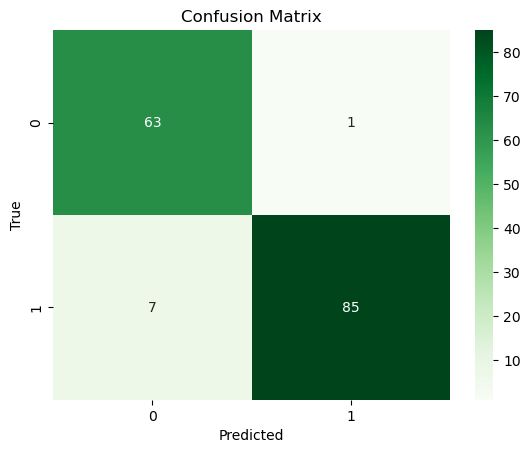

In [19]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict) 
f1 = f1_score(y_test, y_predict)    

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9884
Recall: 0.9239
ROC AUC: 0.9541
F1 Score: 0.9551


In [21]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier
RC = RandomForestClassifier()
RC = RC.fit(X_train_s, y_train)
y_predict = RC.predict(X_test_s)
print (f'model score on training data: {RC.score(X_train_s, y_train)}')
print (f'model score on testing data: {RC.score(X_test_s, y_test)}')


model score on training data: 1.0
model score on testing data: 0.9615384615384616


In [22]:
#permutation importance
perm_importance = permutation_importance(RC, X_test_s, y_test, n_repeats=10, random_state=42)

#feature importances
feature_importances = perm_importance.importances_mean
print("Permutation Importance:")
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance:.4f} (Decrease in Accuracy)")

Permutation Importance:
Age: 0.0071 (Decrease in Accuracy)
Gender: 0.0609 (Decrease in Accuracy)
Polyuria: 0.1750 (Decrease in Accuracy)
Polydipsia: 0.1250 (Decrease in Accuracy)
sudden weight loss: 0.0058 (Decrease in Accuracy)
weakness: -0.0013 (Decrease in Accuracy)
Polyphagia: 0.0026 (Decrease in Accuracy)
Genital thrush: -0.0019 (Decrease in Accuracy)
visual blurring: -0.0026 (Decrease in Accuracy)
Itching: -0.0064 (Decrease in Accuracy)
Irritability: 0.0006 (Decrease in Accuracy)
delayed healing: 0.0006 (Decrease in Accuracy)
partial paresis: 0.0019 (Decrease in Accuracy)
muscle stiffness: -0.0071 (Decrease in Accuracy)
Alopecia: 0.0256 (Decrease in Accuracy)
Obesity: -0.0019 (Decrease in Accuracy)


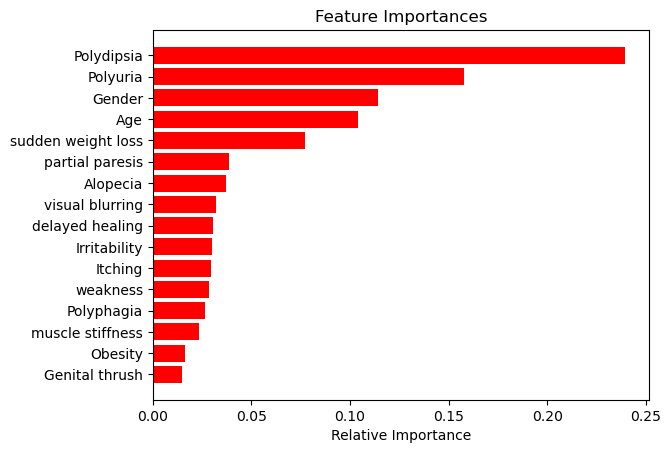

In [23]:
features = df1.drop('class', axis=1).columns
importances = RC.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

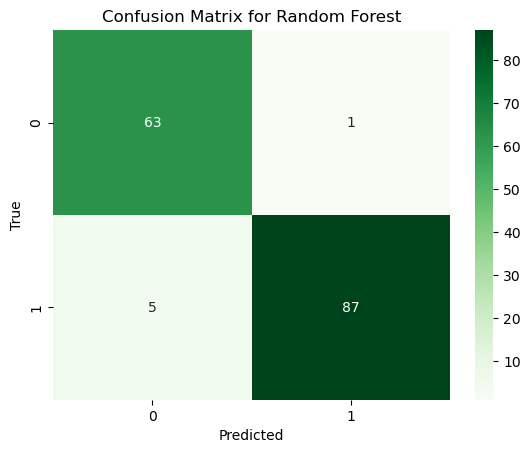

In [24]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [25]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict) 
f1 = f1_score(y_test, y_predict)    

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9886
Recall: 0.9457
ROC AUC: 0.9650
F1 Score: 0.9667


In [26]:
#Decision Trees:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'gini', max_features = 10 , max_depth = 5)
DTC = DTC.fit(X_train_s, y_train)
y_predict = DTC.predict(X_test)
print (f'model score on training data: {DTC.score(X_train_s, y_train)}')
print (f'model score on testing data: {DTC.score(X_test_s, y_test)}')

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict) 
f1 = f1_score(y_test, y_predict)    

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


model score on training data: 0.967032967032967
model score on testing data: 0.8846153846153846
Precision: 0.8182
Recall: 0.7826
ROC AUC: 0.7663
F1 Score: 0.8000


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


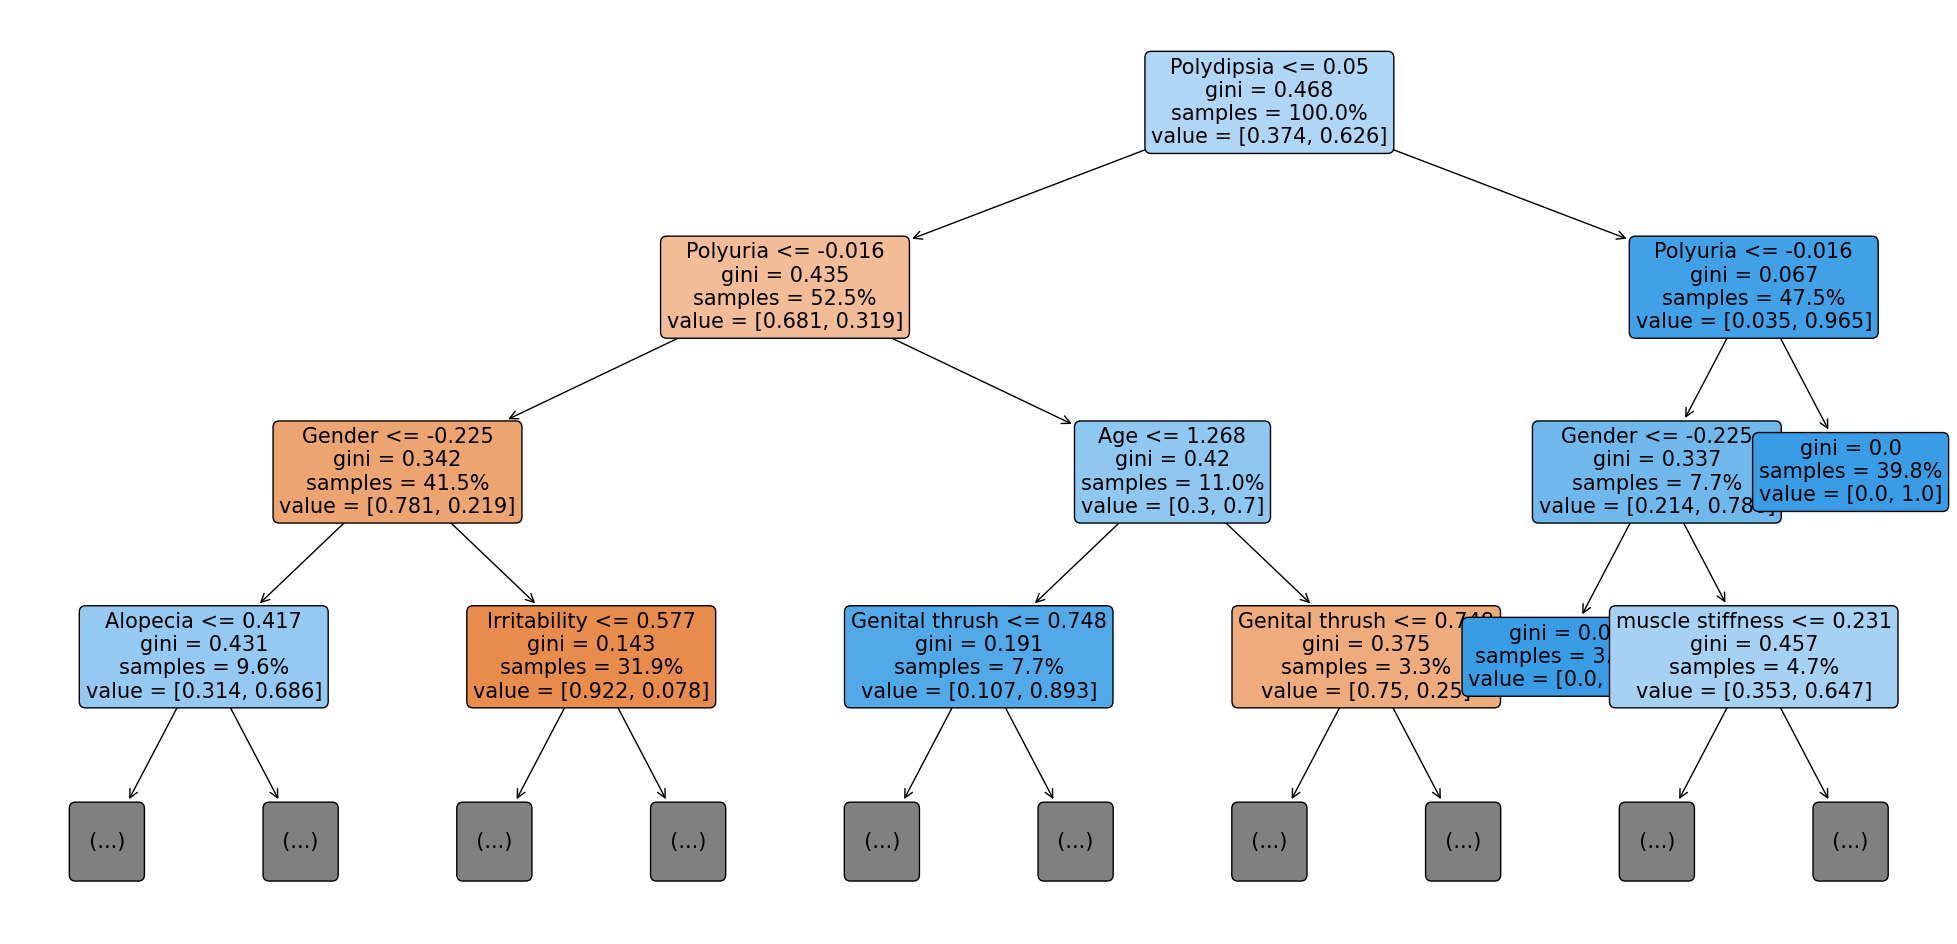

In [27]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(25,12))

plot_tree(
    decision_tree = DTC,
    feature_names = df1.columns,
    filled = True, 
    rounded = True, 
    proportion = True, 
    max_depth = 3, 
    fontsize = 15, 
    ax=ax, 
);

In [28]:
#XGB Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = xgb.fit(X_train_s, y_train)
y_predict = xgb.predict(X_test_s)
print (f'model score on training data: {xgb.score(X_train_s, y_train)}')
print (f'model score on testing data: {xgb.score(X_test_s, y_test)}')

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_predict) 
f1 = f1_score(y_test, y_predict)    

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


model score on training data: 1.0
model score on testing data: 0.9551282051282052
Precision: 0.9885
Recall: 0.9348
ROC AUC: 0.9596
F1 Score: 0.9609


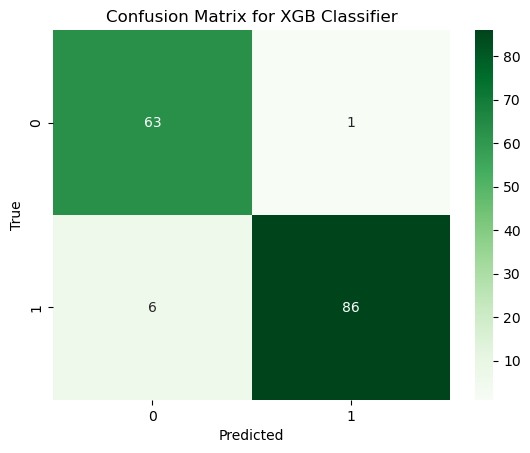

In [29]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGB Classifier')
plt.show()

In [30]:
"""
Different Models were tried for the dataset: Logistic Regression, Linear SVC, SVC, Random Forest, Decision Trees, XGB Classifier
Conclusion:
Random Forest works as the most accurate model which shows the best reults with Polydipsia(excessive thirst) and Polyuria(execcisve 
urine production by the body) being the most important features.
model score on training data: 1.0
model score on testing data: 0.9807692307692307
Precision score: 0.9895
Recall score: 0.9792
ROC AUC: 0.9812
F1 score: 0.9843
"""

'\nDifferent Models were tried for the dataset: Logistic Regression, Linear SVC, SVC, Random Forest, Decision Trees, XGB Classifier\nConclusion:\nRandom Forest works as the most accurate model which shows the best reults with Polydipsia(excessive thirst) and Polyuria(execcisve \nurine production by the body) being the most important features.\nmodel score on training data: 1.0\nmodel score on testing data: 0.9807692307692307\nPrecision score: 0.9895\nRecall score: 0.9792\nROC AUC: 0.9812\nF1 score: 0.9843\n'